# Importera biblan

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly_express as px
import scipy
import seaborn as sns

# Öppna fil

In [15]:
#Öppna csv fil
with open("korea.csv", mode="r") as file:
    df_raw = pd.read_csv("korea.csv", delimiter=",")

## Region kopplat med inkomst (förundersökning) region numrerat

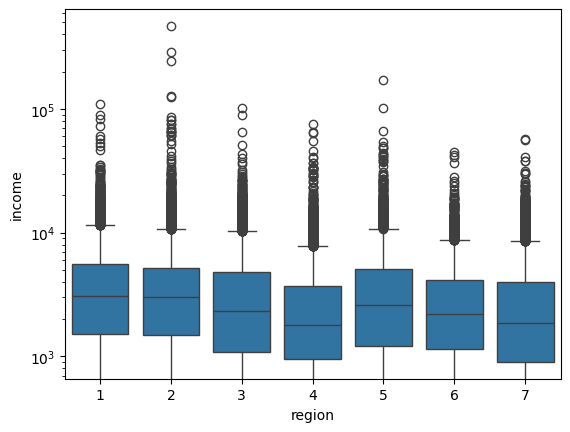

In [16]:
def region_income(file=df_raw):
    sns.boxplot(x="region", y="income", data=file)
    plt.yscale("log")
    plt.show()
    return
region_income()

## År född samt inkomst kopplat med utbildning

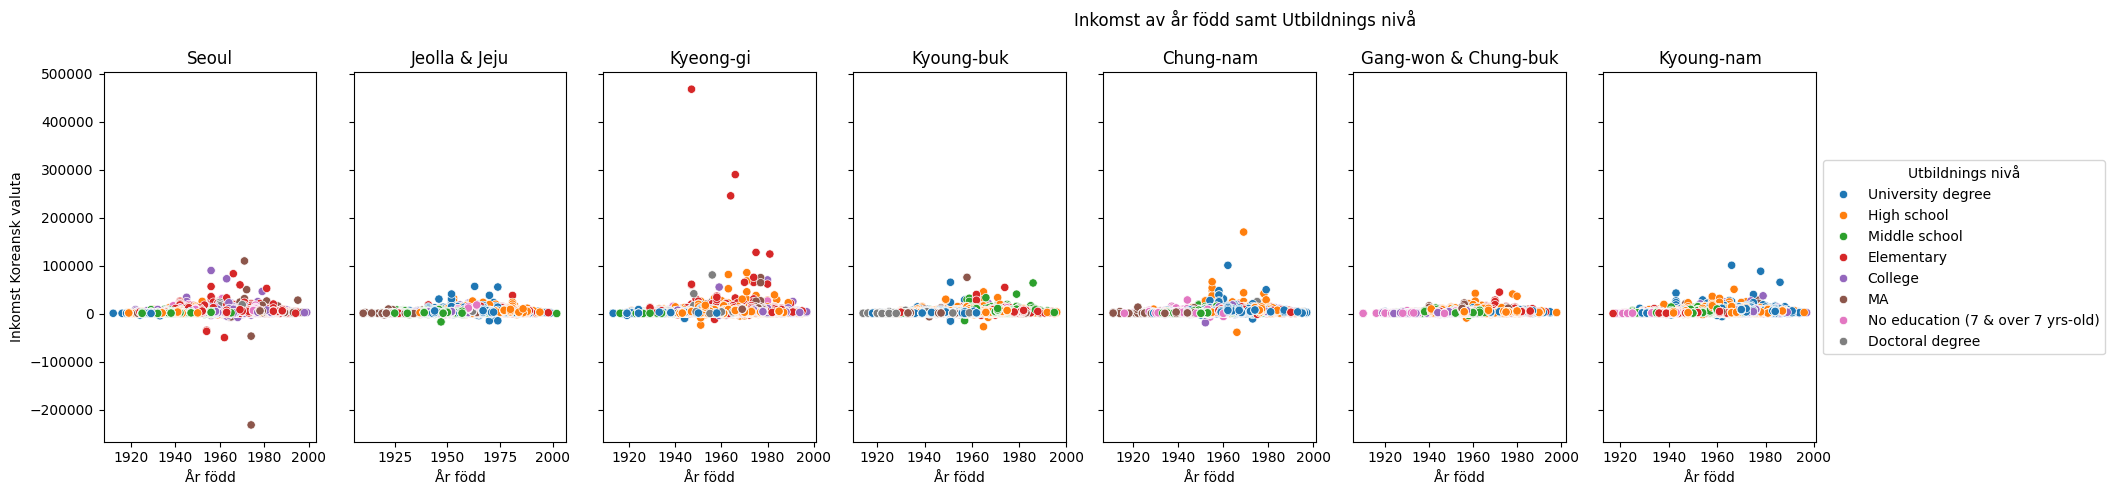

: 

In [36]:
data = pd.read_csv("korea.csv")


data['education_level'] = data['education_level'].map({
    1: 'No education (under 7 yrs-old)', 2: 'No education (7 & over 7 yrs-old)', 3: 'Elementary',
    4: 'Middle school', 5: 'High school', 6: 'College',
    7: 'University degree', 8: 'MA', 9: 'Doctoral degree'
})

data['region'] = data['region'].map({
    1: 'Seoul', 2: 'Kyeong-gi', 3: 'Kyoung-nam', 4: 'Kyoung-buk',
    5: 'Chung-nam', 6: 'Gang-won & Chung-buk', 7: 'Jeolla & Jeju'
})


regions = data['region'].unique()
fig, axes = plt.subplots(1, len(regions), figsize=(25, 5), sharey=True)


for i, region in enumerate(regions):
    sns.scatterplot(ax=axes[i], data=data[data['region'] == region], x='year_born', y='income', hue='education_level')
    axes[i].set(title=region, xlabel='År född', ylabel='Inkomst Koreansk valuta')
    if i != len(regions) - 1:
        axes[i].get_legend().remove()


axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Utbildnings nivå')
plt.suptitle("Inkomst av år född samt Utbildnings nivå")
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()



## Vilken utbildning har givit störst BNP för Syd-Korea

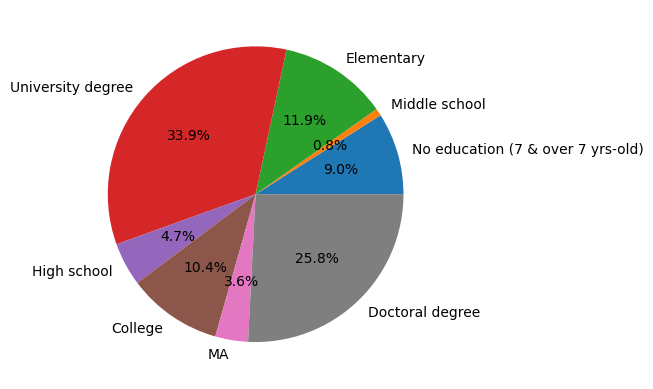

In [29]:
education_map = {
    2: "No education (7 & over 7 yrs-old)",
    3: "Elementary",
    4: "Middle school",
    5: "High school",
    6: "College",
    7: "University degree",
    8: "MA",
    9: "Doctoral degree",
}

df_raw["education_level"] = df_raw["education_level"].map(education_map)

plt.pie(
    df_raw.groupby("education_level")["income"].sum(),
    labels=df_raw["education_level"].unique(),
    autopct="%1.1f%%",
)
plt.show()
